In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import the xlsx file
data = pd.read_excel("publicationData.xlsx", sheets = "Data")
data

,Article_title,Article_link,General_outcome,Desc_general_outcome,Daily_intake,Descr_daily_intake,Health_outcome,Descr_health_outcome,Environmental_outcome,Descr_environmental_outcome,...,Author_affiliation,Loc_authors,Loc_experiment,Year,Journal,Loc_journal,Loc_editor_journal,Current Impact_Factor,Impact_F_Publishing_Year,Num_Citations
0,Potential of terracing to reduce glyphosate an...,https://link.springer.com/article/10.1007%2Fs1...,Yes,Found glyphosate in soil and sediment,NaN,NaN,NaN,NaN,Yes,Found glyphosate in soil and sediment,...,"Federal University of Paraná (UFPR), Sao Paulo...",Brazil,Brazil,2019,Journal of Soils and Sediments,Springer-USA,"Australia, Canada",2.790,2.79,1.0
1,Uptake and persistence of the herbicide glyph...,https://cdnsciencepub.com/doi/abs/10.1139/x89-128,Yes,High glyphosate levels above maximum permissib...,NaN,NaN,NaN,NaN,Yes,Above maximum permissible residue level,...,"University of Toronto, Forest Pest management ...",Canada,Canada,1989,Canadian Journal of Forest Research,Canada,Canada,1.812,NaN,29.0
2,Residues of glyphosate and its metabolite AMPA...,https://cdnsciencepub.com/doi/pdf/10.4141/cjps...,No,Accepted seed residues of less than 5.0 mg kg-...,NaN,NaN,NaN,NaN,No,No residue when applied within accepted range,...,Agriculture and Agri-Food Canada Research Stat...,Canada,Canada,1994,Canadian journal of plant science,Canada,Canada,0.680,NaN,31.0
3,Glyphosate pathways to modern diseases VI: Pri...,http://www.amsi.ge/jbpc/11717/25SA16A.pdf,Yes,Health risks associated with the indiscrimina...,NaN,NaN,Yes,"Health risk, presence of glyphosate in many po...",NaN,NaN,...,Samsel Environmental and Public Health Service...,USA,USA,2017,Journal of Biological Physics and Chemistry (J...,"Basel, Switzerland",UK,2.950,2.95,20.0
4,A generational study of glyphosate-tolerant so...,https://doi.org/10.1016/j.fct.2003.08.003,No,It was concluded that the transgenic soybean ...,NaN,NaN,No,No negative effect,NaN,NaN,...,"Department of Chemistry and Biochemistry, Sout...",USA,USA,2004,Food and Chemical Toxicology,"Elseivier, Netherlands",Spain,4.679,2.662,108.0
5,Effects of Soil Phosphorus Status on Environme...,http://dx.doi.org/10.2134/jeq2007.0256,Yes,Intensive use makes it one of the herbicides o...,NaN,NaN,NaN,NaN,Yes,Leaching into water,...,"MTT Agrifood Research Finland, FI‐31600 Jokioi...",Finland,Finland,2008,Journal of Environmental Quality,USA,USA,2.600,1.559,29.0
6,Leaching of Glyphosate and Aminomethylphosphon...,http://dx.doi.org/10.2136/vzj2014.05.0054,No,Glyphosate leaching and transport are event dr...,NaN,NaN,NaN,NaN,No,Leaching is not due to glyphosate,...,"Dep. of Agroecology, Faculty of Sciences and T...",Denmark,Denmark,2014,Vadose Zone Journal,USA,USA,2.504,1.78,22.0
7,Long-Term Fate of Glyphosate Associated with R...,https://link.springer.com/article/10.1007%2Fs0...,No,Unlikely detrimental effects to aquatic biota,NaN,NaN,NaN,NaN,No,Under worst-case conditions short- and long-te...,...,"U.S. Fish and Wildlife Service, Refuges and Wi...",USA,USA,2001,Archives of Environmental Contamination and To...,Germany,Canada,2.552,2.24,31.0
8,Final review of the Séralini et al. (2012a) pu...,http://dx.doi.org/10.2903/j.efsa.2012.2910,No,Available evidence does not impact on the ongo...,NaN,NaN,No,Evidence not sufficient,NaN,NaN,...,European Food Safety Authority,Italy,Italy,2012,European Food Safety Authority Journal,Italy,Europe (Italy),NaN,NaN,13.0
9,Hypothetical adjustment of the acceptable dail...,https://academicjournals.org/journal/JTEHS/art...,Yes,"The NOAEL, cRfD and ADI, originally assessed ...",Yes,Underestimated Accepted Daily Intaek,NaN,NaN,NaN,NaN,...,"Department of Chemistry and Toxicology, Plant ...",Egypt,Italy,2016,Journal of Toxicology and Environmental\nHealt...,NaN,Turkey,0.000,NaN,3.0


In [2]:
# remove extraneous spaces and standardize capitalization
strip_cols = ["Fund_source", "Fund_Source", "Loc_authors","Loc_experiment", 
              "Loc_journal", "Loc_editor_journal"]
for key in strip_cols:
    data[key] = data[key].str.strip().str.upper()

In [3]:
#transform outcomes to indicator variables
outcomes = ["Health_outcome", "Environmental_outcome"]
for outcome in outcomes:
    data[outcome][data[outcome].str.strip().str.title()=="Yes"] = 1
    data[outcome][data[outcome].str.strip().str.title()=="No"] = 0
    data[outcome].fillna(0, inplace = True)
    
# create column that combines environmental and health outcomes
# if value from either column is 1, entry in Either_outcome is 1, else 0
data["Either_outcome"] = 0
data["Either_outcome"][data["Health_outcome"] ==1] = 1
data["Either_outcome"][data["Environmental_outcome"] ==1] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipyker

In [4]:
data.to_excel("dataWithSomeReformatting.xlsx")

In [5]:
def create_indicators(data, column_names):

    # create a dictionary with the set of possible responses for each heading in the headings list
    indicator_responses = {heading : sorted(list(set(data[heading]))) for heading in headings}

    # cycle through the heading and possible responses
    for heading, responses in indicator_responses.items():

        # for each possible response, create a new column
        for response in responses:
            # make all values in that column 0 by default
            data[response] = 0
            # identify the subset of data where the data in the row matches response
            # make values in that column 1 if their response matches the response 
            # in the original column of data
            data[response][data[heading] == response] = 1


In [6]:
# structure for creating indicator variable for a given entry 
# in this case, one indicator variable for each journal
#headings = ["Journal"]
#create_indicators(data, headings)

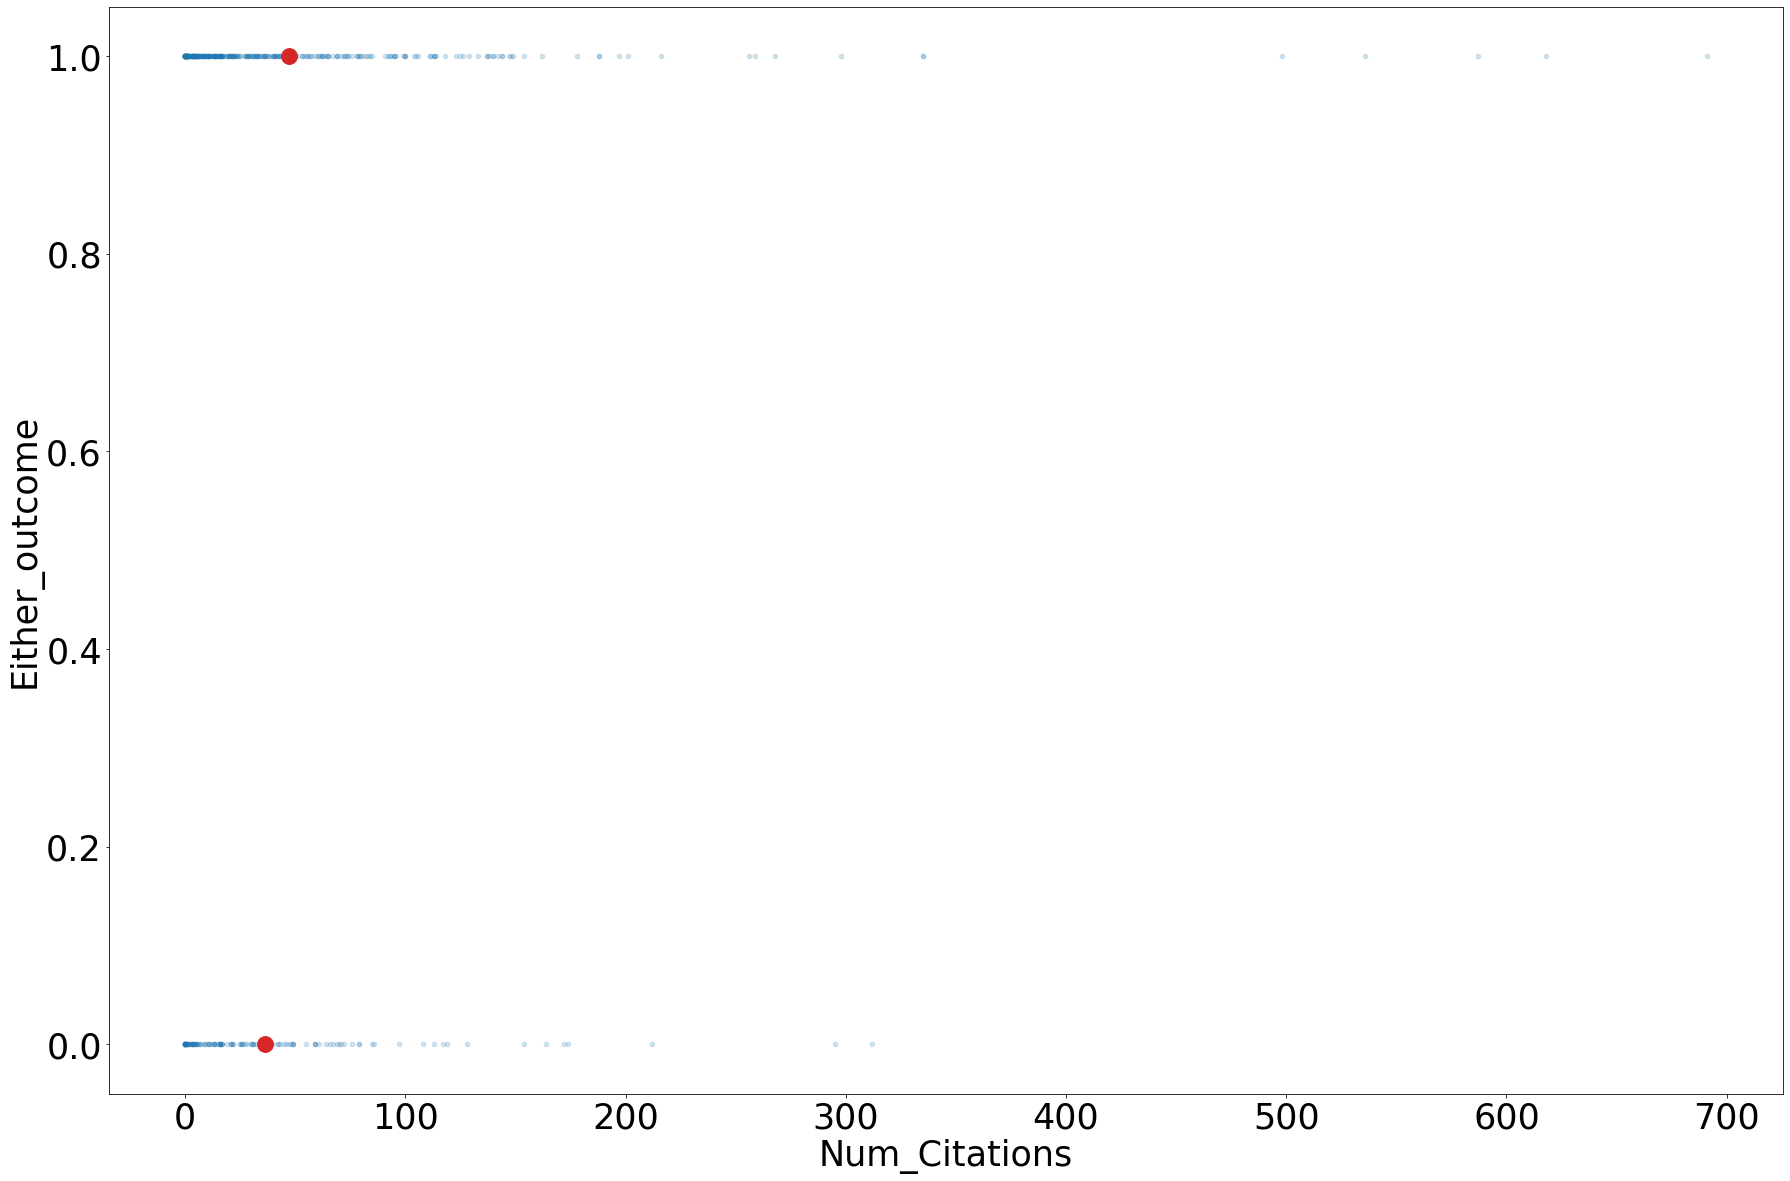

In [7]:
plt.rcParams["font.size"] = 35
fig,ax =plt.subplots(figsize = (30,20))
data.plot.scatter(x="Num_Citations", y = "Either_outcome", alpha=.2, ax=ax)
ax.scatter(x = data["Num_Citations"][data["Either_outcome"]==1].mean(), y=1, s = 250, c = "C3")
ax.scatter(x = data["Num_Citations"][data["Either_outcome"]==0].mean(), y=0, s = 250, c = "C3")

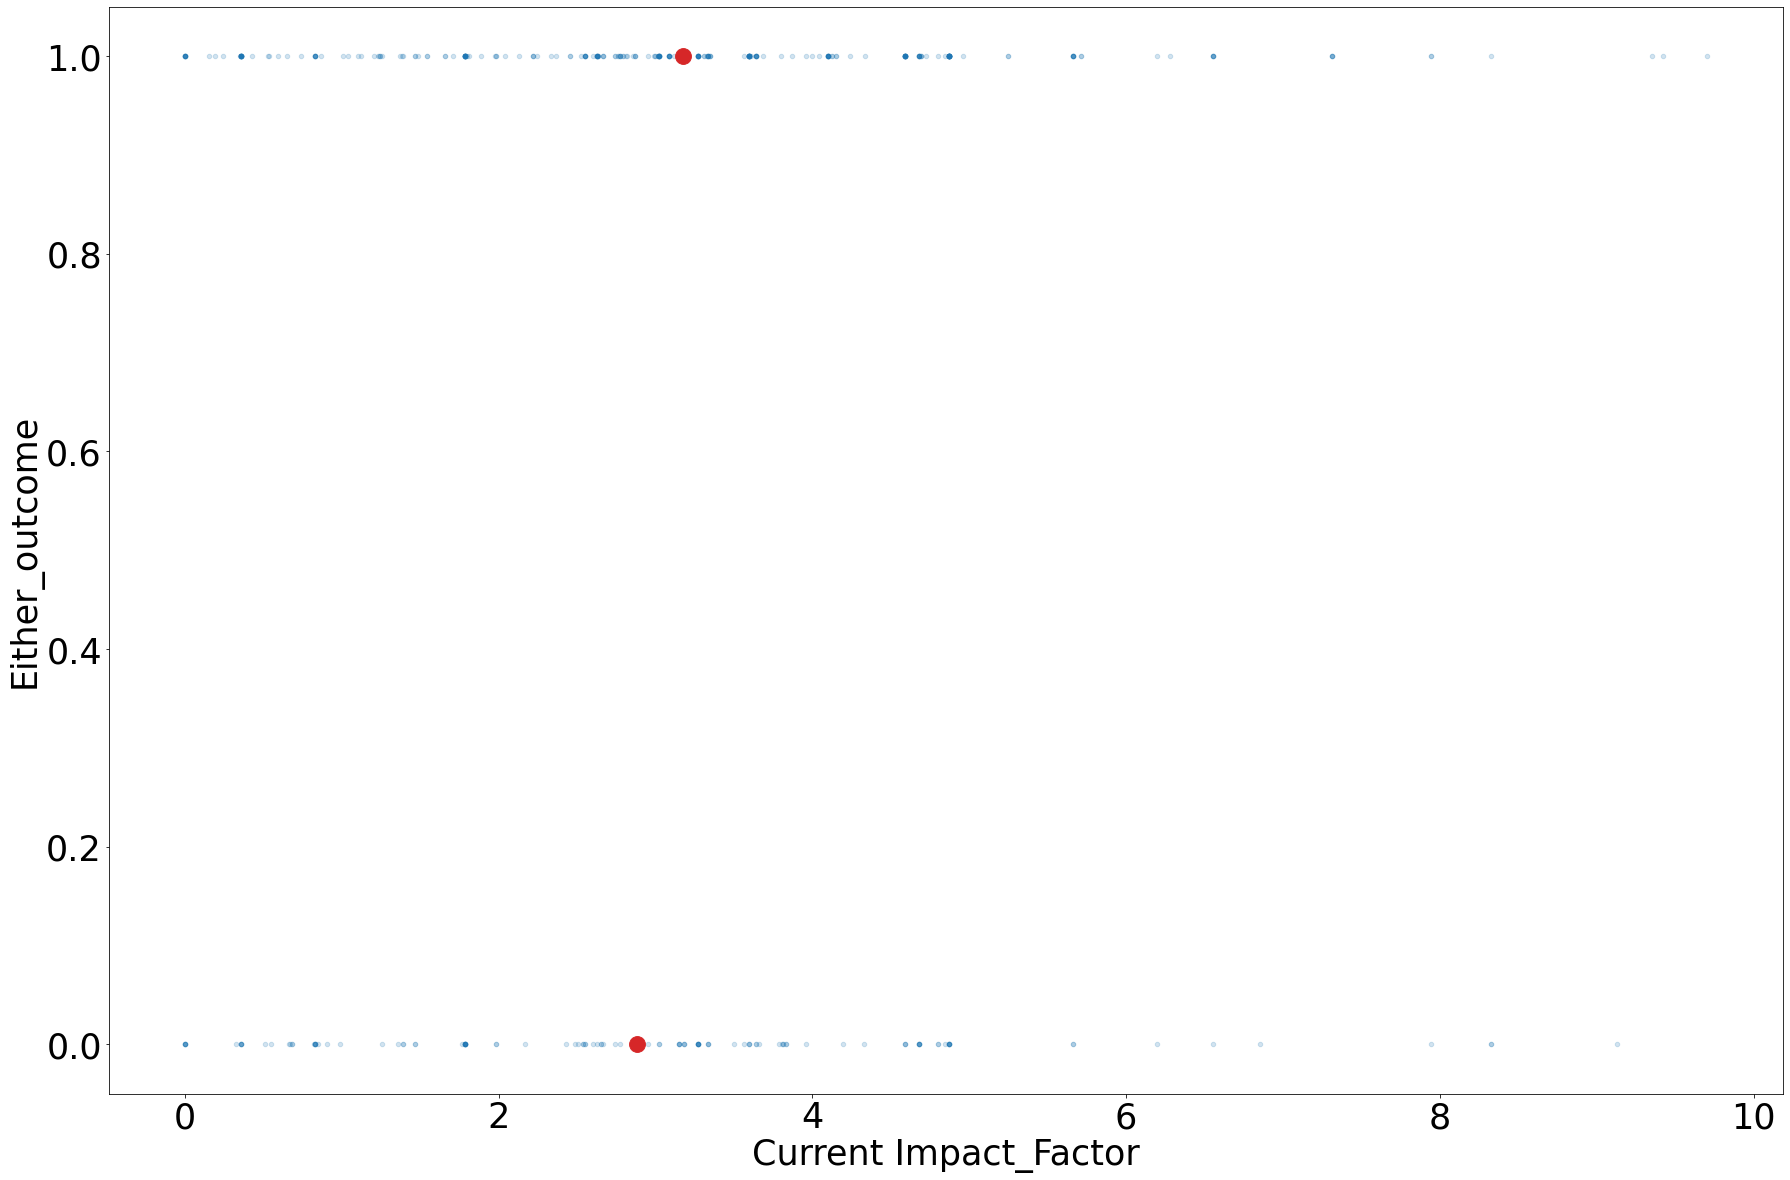

In [8]:
fig,ax =plt.subplots(figsize = (30,20))
data.plot.scatter(x="Current Impact_Factor", y = "Either_outcome", alpha=.2, ax=ax)
ax.scatter(x = data["Current Impact_Factor"][data["Either_outcome"]==1].mean(), y=1, s = 250, c = "C3")
ax.scatter(x = data["Current Impact_Factor"][data["Either_outcome"]==0].mean(), y=0, s = 250, c = "C3")

<AxesSubplot:xlabel='Year', ylabel='Either_outcome'>

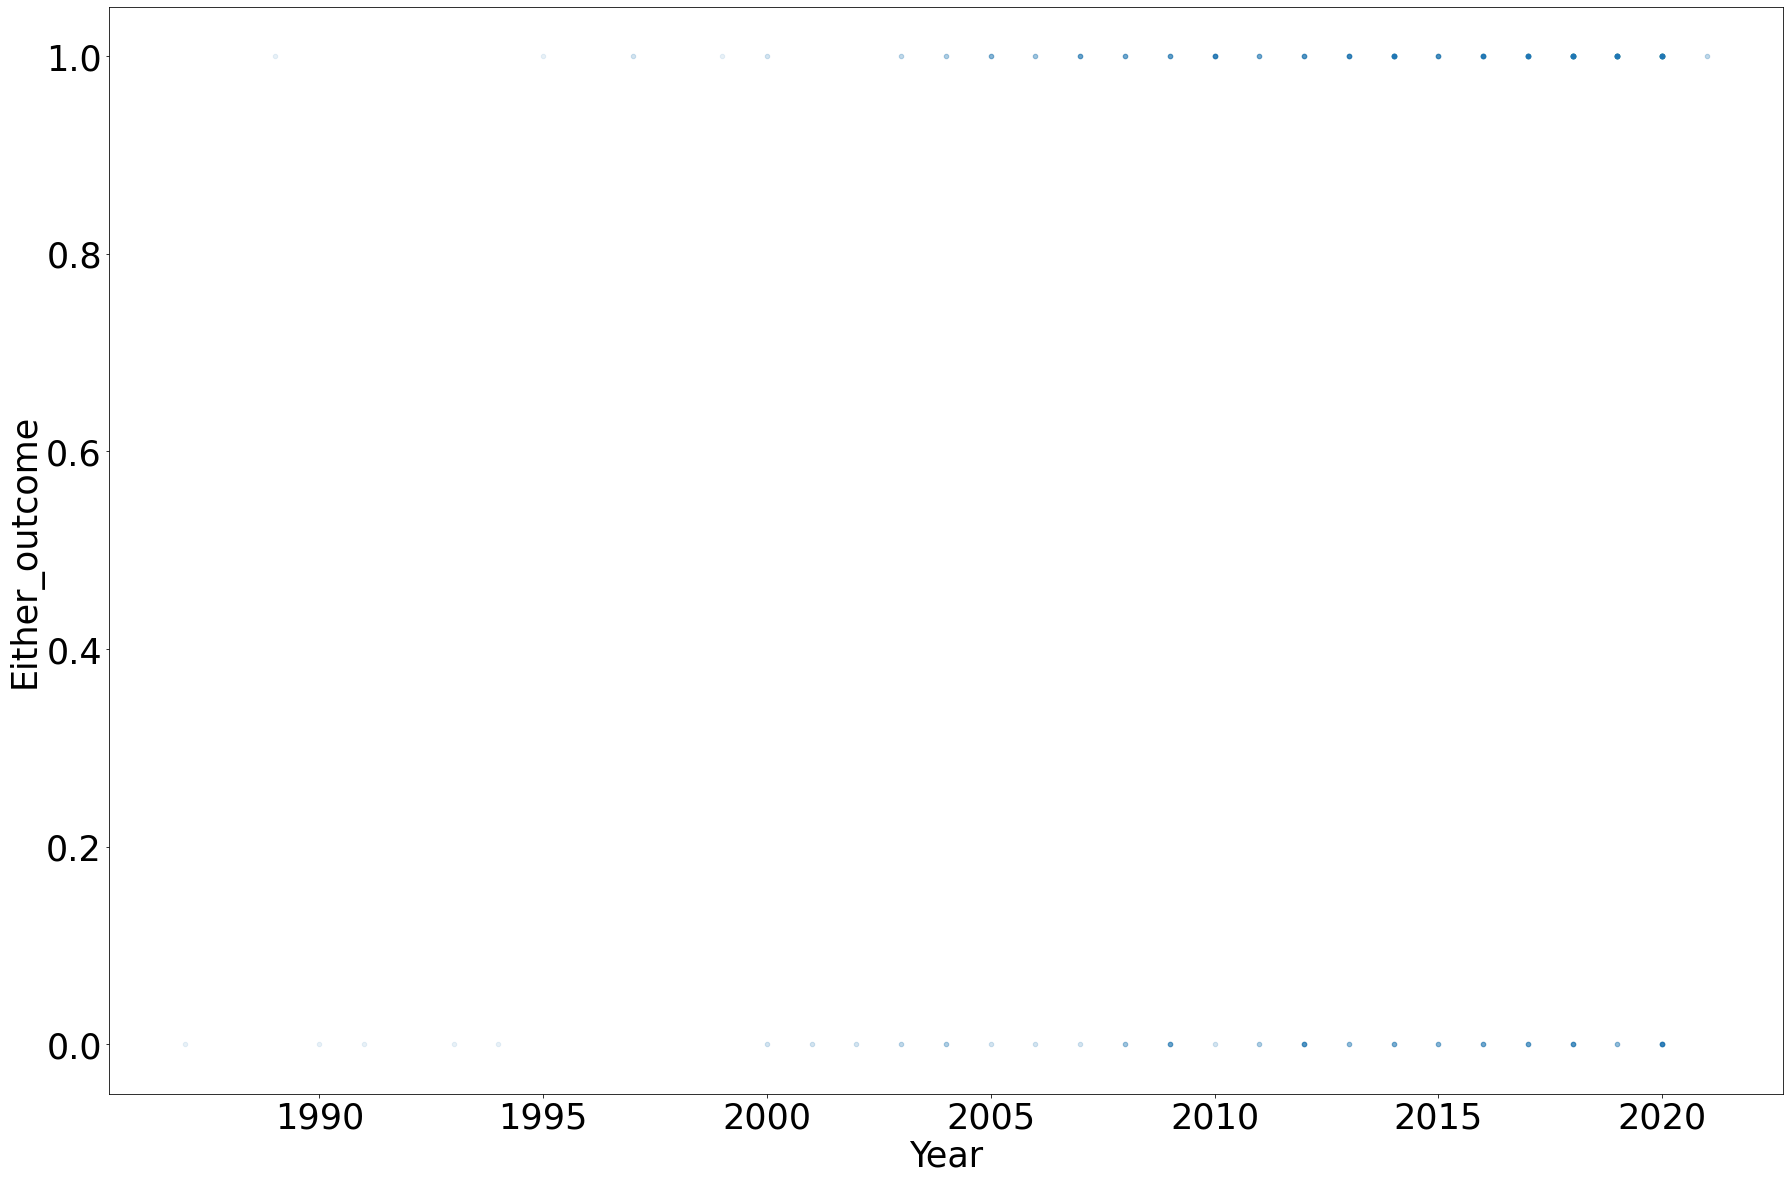

In [9]:
fig,ax =plt.subplots(figsize = (30,20))
data.plot.scatter(x="Year", y = "Either_outcome", alpha =.1, ax=ax)

In [10]:
# set view options to show entire dataframe
pd.set_option("max_rows", len(data.index))
pd.set_option("max_columns", len(data.columns))

In [11]:
# show results by country
outcomes_by_country = data.groupby("Loc_experiment").mean()[["Either_outcome"]]
outcomes_by_country["num_obs"] = data["Loc_experiment"].value_counts()

# sort by number of observations
outcomes_by_country.sort_values("num_obs", ascending = False)

,Either_outcome,num_obs
Loc_experiment,,
BRAZIL,0.803922,102
ARGENTINA,0.873418,79
USA,0.555556,63
CANADA,0.433333,30
FRANCE,0.875000,24
CHINA,0.863636,22
POLAND,0.705882,17
ITALY,0.750000,16
GERMANY,0.600000,15


In [12]:
# sort by average of "Either_outcome"
outcomes_by_country.sort_values("Either_outcome", ascending = False)

,Either_outcome,num_obs
Loc_experiment,,
TURKEY,1.000000,8
GREECE,1.000000,2
SOUTH AFRICA,1.000000,2
TUNISIA,1.000000,1
SLOVAK REPUBLIC,1.000000,1
ROMANIA,1.000000,1
REPUBLIC OF KOREA,1.000000,1
NORWAY,1.000000,1
NORTH AMERICA,1.000000,1


In [13]:
data.groupby("Journal").mean()[[]]

""
Journal
Canadian Journal of Plant Science
In Key Engineering Materials
L. REVISTA DE CHIMIE
Proceedings of the National Academy of Sciences
3 Biotech
Acta Agrobotanica
Acta Scientiarum. Agronomy
Aeolian Research
"Agriculture, Ecosystems & Environment"


In [14]:
# Average Outcome by Journal - Sort by number of observations
outcomes_by_journal = data.groupby("Journal").mean()[["Either_outcome"]]
outcomes_by_journal["num_obs"] = data["Journal"].value_counts()
outcomes_by_journal.sort_values("num_obs", ascending = False)

,Either_outcome,num_obs
Journal,,
Ecotoxicology and Environmental Safety,0.810811,37
Aquatic Toxicology,0.869565,23
Bulletin of environmental contamination and toxicology,0.695652,23
Environmental Toxicology and Pharmacology,0.869565,23
Planta Daninha,0.782609,23
Environmental Toxicology and Chemistry,0.714286,14
Food and Chemical Toxicology,0.571429,14
"Journal of Environmental Science and Health, Part B",0.583333,12
Toxicology,1.000000,12


In [15]:
# Average Outcome by Journal - Sort by Average Outcome
outcomes_by_journal.sort_values("Either_outcome", ascending = False)

,Either_outcome,num_obs
Journal,,
journal of the canadian association of gastroenterology,1.000000,1
"Journal Of Environmental Science, Toxicology And Food Technology",1.000000,1
Journal of Environmental Health and Sustainable Development,1.000000,1
Journal of Environmental Biology,1.000000,1
Journal of Endocrinology,1.000000,1
Journal of Developmental Origins of Health and Disease,1.000000,1
Revista Árvore,1.000000,1
Journal of Chromatography\nSeparation Techniques,1.000000,1
Journal of Biological Physics and Chemistry (J Biol Phys Chem),1.000000,1


In [16]:
data.keys()

Index(['Article_title', 'Article_link', 'General_outcome',
       'Desc_general_outcome', 'Daily_intake', 'Descr_daily_intake',
       'Health_outcome', 'Descr_health_outcome', 'Environmental_outcome',
       'Descr_environmental_outcome', 'Fund_source', 'Fund_Source',
       'Fund_amount', 'Author_affiliation', 'Loc_authors', 'Loc_experiment',
       'Year', 'Journal', 'Loc_journal', 'Loc_editor_journal',
       'Current Impact_Factor', 'Impact_F_Publishing_Year', 'Num_Citations',
       'Either_outcome'],
      dtype='object')

In [17]:
# Average Outcome Value by Fund_Source
outcome_by_funding_agg = data.groupby("Fund_Source").mean()[["Either_outcome"]]
outcome_by_funding_agg["num_obs"] =data["Fund_Source"].value_counts()
outcome_by_funding_agg.sort_values("Either_outcome", ascending = False)

,Either_outcome,num_obs
Fund_Source,,
ARGENTINA,1.000000,1
PUBLIC & PRIVATE,1.000000,1
UNIVERSITY AND PUBLIC,1.000000,2
UNIVERSITY (THESIS),1.000000,1
RESEARCH CENTRE,1.000000,2
PUBLIC AND UNVERSITY,1.000000,2
PUBLIC AND UNIVERSTY,1.000000,3
PUBLIC AND PHD FUNDING,1.000000,1
PUBLIC AND INTERNATONAL ORG,1.000000,1


In [18]:
# Average Outcome Value by Fund_source
outcomes_by_funding_particular = data.groupby("Fund_source").mean()[["Either_outcome"]]
outcomes_by_funding_particular["num_obs"] = data["Fund_source"].value_counts()
outcomes_by_funding_particular

,Either_outcome,num_obs
Fund_source,,
ACADEMY OF FINLAND,1.000000,1
"ACADEMY OF FINLAND (PROJECTS 326226 AND 311077), THE MAJ AND TOR NESSLING FOUNDATION (GRANT NO. 201800048 TO AM), AND THE FINNISH CULTURAL FOUNDATION.",1.000000,1
"ACADEMY OF FINLAND [PROJECTS OF LL, NO: 250248 & 252411], ALFRED KORDELIN FOUNDATION (MR) AND TIINA AND ANTTI HERLIN FOUNDATION (MR)",1.000000,1
"ACADEMY OF SCIENCE FOR DEVELOPING WORLD (TWAS) AND THE DEPARTMENT OF BIOTECHNOLOGY (DBT), MINISTRY OF SCIENCE AND TECHNOLOGY, GOVERNMENT OF INDIA FOR THE POST-DOCTORAL FELLOWSHIP (PDF",1.000000,1
ADEME (AGENCE DE L’ENVIRONNEMENT ET DE LA MAÎTRISE DE L’ENERGIE) AND THE REGIONAL COUNCIL OF FRANCHE-COMTÉ.,1.000000,1
AFK FROM THE NATIONAL INSTITUTE OF ENVIRONMENTAL HEALTH SCIENCES,0.000000,1
AFYON KOCATEPE UNIVERSITY SCIENTIFIC RESEARCH PROJECT COORDINATION UNIT,1.000000,1
"AG SPECTRUM CO. DEWITT, IOWA AND USDA SPECIAL GRANT NUMBER 2003-06156",0.000000,1
"AGENCIA DE PROMOCIÓN CIENTÍFICA Y TECNOLÓGICA (ANPCYT-FONCYT) (PICT 2008-229) TO SBR, CONSEJO NACIONAL DE INVESTIGACIONES CIENTÍFICAS Y TECNOLÓGICAS (CONICET) (PIP 0947) TO SBR, SECRETARÍA DE CIENCIA Y TECNOLOGÍA (SECTEL) PROVINCIA DE SANTA FE (NOS. 217309 AND 2010-105-11) TO SBR AND UNIVERSIDAD NACIONAL DE ROSARIO (UNR BIO 249) TO SBR, ARGENTINA.",1.000000,1


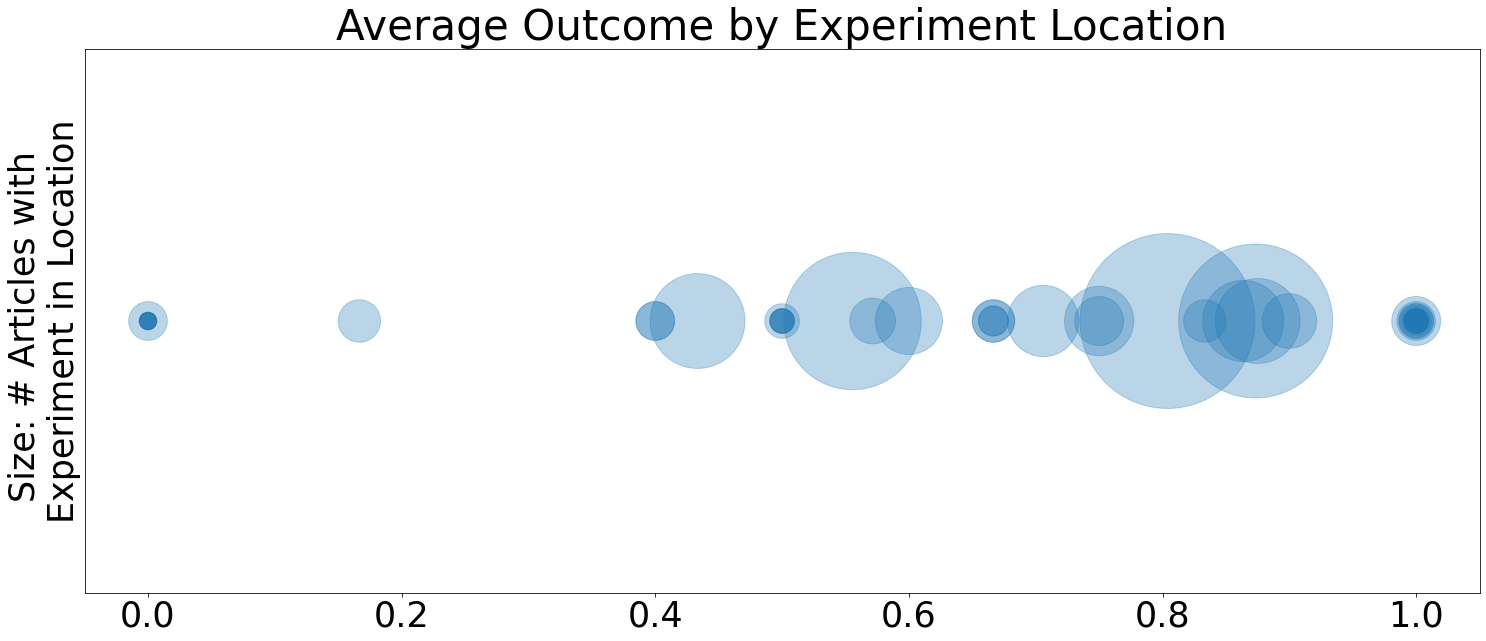

In [23]:
fig, ax = plt.subplots(figsize = (25,10))
plt.title("Average Outcome by Experiment Location")
ax.set_ylabel('Size: # Articles with \nExperiment in Location')
ax.set_yticks([])
plt.scatter(x = outcomes_by_country["Either_outcome"], y = [0] * len(outcomes_by_country.index), 
            s = outcomes_by_country["num_obs"]*300, alpha = .3)

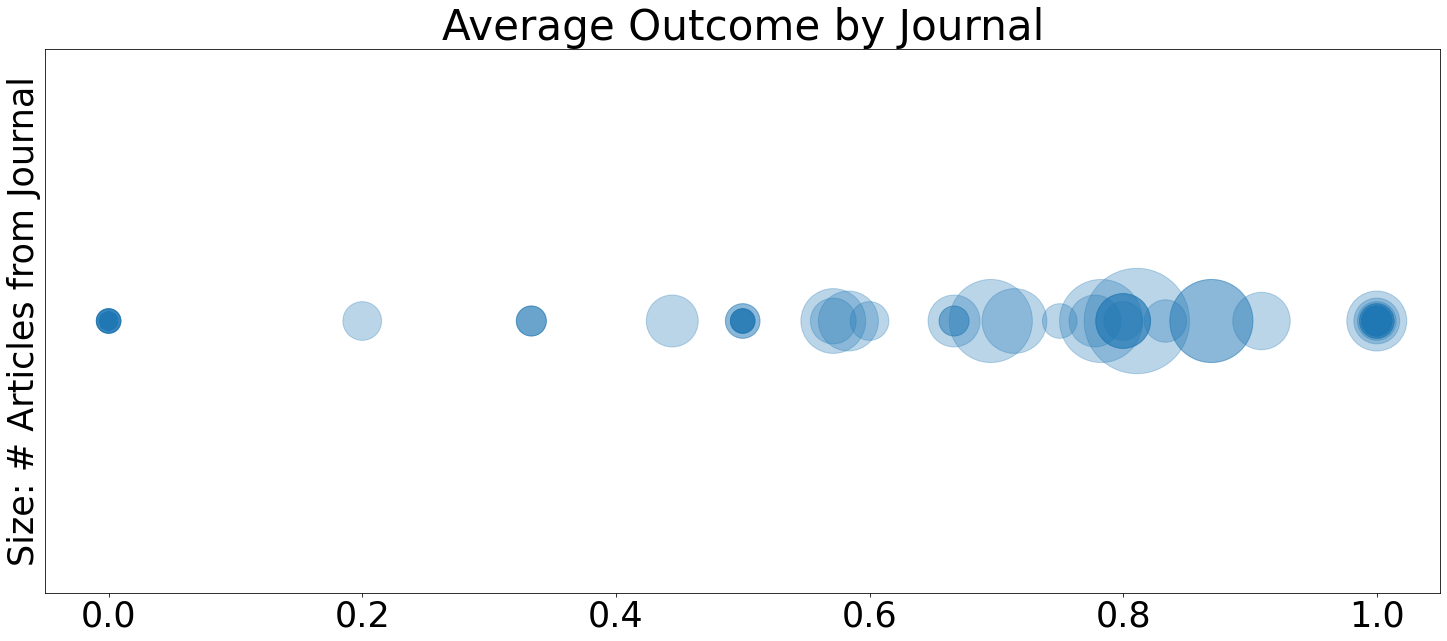

In [20]:
fig, ax = plt.subplots(figsize = (25,10))
plt.title("Average Outcome by Journal")
ax.set_ylabel('Size: # Articles from Journal')
ax.set_yticks([])
plt.scatter(x = outcomes_by_journal["Either_outcome"], y = [0] * len(outcomes_by_journal.index), 
            s = outcomes_by_journal["num_obs"]*300, alpha = .3)